In [24]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [16]:
# Import the data into a Pandas DataFrame
housing_df = pd.read_csv("Resources/Housing_history.csv")
housing_df.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202307,Rhode Island,RI,550000.0,0.0046,0.1573,1003.0,0.0437,-0.3268,36.0,...,1050556.0,0.0494,0.3553,2615.0,-0.0130,-0.2394,1.6181,-0.1581,0.2947,0.0
1,202307,Michigan,MI,297000.0,-0.0075,0.0425,16106.0,0.0980,-0.2071,36.0,...,424210.0,-0.0087,0.0609,25139.0,0.0677,-0.1976,0.5651,-0.0439,0.0276,0.0
2,202307,Nebraska,NE,359000.0,-0.0296,0.1397,3493.0,0.1009,0.1671,43.0,...,423940.0,-0.0207,0.1038,6562.0,0.0316,-0.0353,0.8932,-0.1087,-0.3978,0.0
3,202307,Idaho,ID,597750.0,-0.0021,0.0489,6847.0,0.0916,-0.1712,46.0,...,891178.0,0.0121,0.0682,10251.0,0.0593,-0.1624,0.5002,-0.0480,0.0173,0.0
4,202307,Arkansas,AR,299900.0,0.0098,0.0905,7509.0,0.0522,0.1505,53.0,...,399636.0,0.0039,0.0652,11899.0,0.0381,0.0431,0.5998,-0.0240,-0.1684,0.0


In [52]:
housing_df_organized = housing_df[["state","month_date_yyyymm","median_listing_price"]]
housing2_df = housing_df_organized.rename(columns={"month_date_yyyymm":"Year_Month",
                                                      "state":"State",
                                                      "median_listing_price":"Median Lising Price"})
housingclean_df = housing2_df.dropna(how='any')
housingclean_df

,State,Year_Month,Median Lising Price
0,Rhode Island,202307,550000.0
1,Michigan,202307,297000.0
2,Nebraska,202307,359000.0
3,Idaho,202307,597750.0
4,Arkansas,202307,299900.0
...,...,...,...
4330,District of Columbia,201607,579900.0
4331,Illinois,201607,224900.0
4332,Maryland,201607,299900.0
4333,Ohio,201607,139900.0


In [59]:
# Get all the data for December 2016
housing2016 = housing2_df.loc[housing2_df['Year_Month'] == '201612']
housing2021 = housing2_df.loc[housing2_df['Year_Month'] == '202112']
new_housing = pd.merge(housing2016, housing2021, on=('State'), how='right')
new_housing = new_housing.rename(columns={"Year_Month_x":"Year_Month_2016",
                                                    "Year_Month_y":"Year_Month_2021",
                                                    "Median Lising Price_x":"Median Lising Price_2016",
                                                    "Median Lising Price_y":"Median Lising Price_2021"})
new_housing

,State,Year_Month_2016,Median Lising Price_2016,Year_Month_2021,Median Lising Price_2021
0,Arkansas,201612,158500.0,202112,229950.0
1,Idaho,201612,259000.0,202112,546950.0
2,Missouri,201612,159000.0,202112,243350.0
3,South Dakota,201612,215000.0,202112,282450.0
4,Iowa,201612,164900.0,202112,219317.0
5,New Jersey,201612,289900.0,202112,419950.0
6,Utah,201612,331650.0,202112,588225.0
7,Virginia,201612,268900.0,202112,366975.0
8,New Hampshire,201612,274900.0,202112,449950.0
9,North Carolina,201612,249000.0,202112,364950.0


[Text(0, 0, 'Arkansas'),
 Text(1, 0, 'Idaho'),
 Text(2, 0, 'Missouri'),
 Text(3, 0, 'South Dakota'),
 Text(4, 0, 'Iowa'),
 Text(5, 0, 'New Jersey'),
 Text(6, 0, 'Utah'),
 Text(7, 0, 'Virginia'),
 Text(8, 0, 'New Hampshire'),
 Text(9, 0, 'North Carolina'),
 Text(10, 0, 'Mississippi'),
 Text(11, 0, 'Alaska'),
 Text(12, 0, 'North Dakota'),
 Text(13, 0, 'New Mexico'),
 Text(14, 0, 'Texas'),
 Text(15, 0, 'Connecticut'),
 Text(16, 0, 'Nevada'),
 Text(17, 0, 'Illinois'),
 Text(18, 0, 'District of Columbia'),
 Text(19, 0, 'South Carolina'),
 Text(20, 0, 'Maryland'),
 Text(21, 0, 'Delaware'),
 Text(22, 0, 'Maine'),
 Text(23, 0, 'Kansas'),
 Text(24, 0, 'Florida'),
 Text(25, 0, 'Pennsylvania'),
 Text(26, 0, 'New York'),
 Text(27, 0, 'Minnesota'),
 Text(28, 0, 'Kentucky'),
 Text(29, 0, 'Michigan'),
 Text(30, 0, 'Indiana'),
 Text(31, 0, 'Oregon'),
 Text(32, 0, 'Vermont'),
 Text(33, 0, 'Louisiana'),
 Text(34, 0, 'Tennessee'),
 Text(35, 0, 'West Virginia'),
 Text(36, 0, 'Alabama'),
 Text(37, 0, 'Wisc

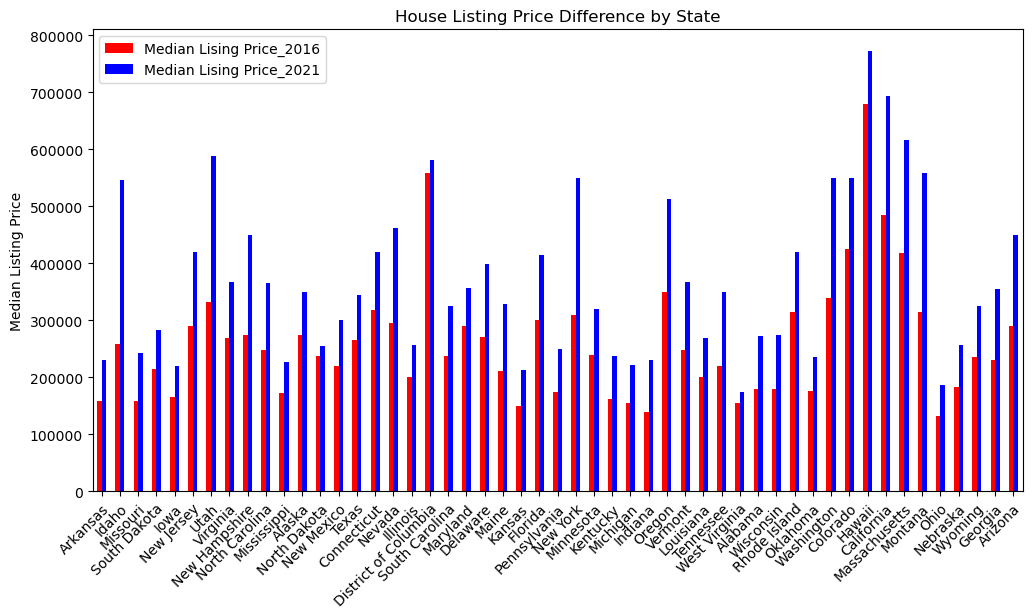

In [74]:
figure1 = new_housing.plot(kind="bar", color=["red", "blue"], figsize=(12,6),
                           title="House Listing Price Difference by State",
                           xlabel="State",
                           ylabel="Median Listing Price")

figure1.set_xticklabels(new_housing['State'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)

In [75]:
plt.savefig("output_data/Fig1.png")

<Figure size 640x480 with 0 Axes>